In [205]:
from rdkit import Chem
import pathlib
import pandas as pd
NAME_PROPERTY = "_MOLSMILES"

In [206]:
def sdftodictlist(sdf_path, minimized):
    allres = []
    suppl = Chem.SDMolSupplier(sdf_path)
    for mol in suppl:
        smiles = mol.GetProp(NAME_PROPERTY)
        cnn_score = mol.GetProp("CNNscore")
        minimizedAffinity = mol.GetProp("minimizedAffinity")
        cnn_affinity = mol.GetProp("CNNaffinity")
        cnn_vs = mol.GetProp("CNN_VS")
        cnnaffinity_variance = mol.GetProp("CNNaffinity_variance")
        res = {"smiles":smiles,
              "cnn_score":cnn_score,
               "minimizedAffinity":minimizedAffinity,
               "cnn_affinity":cnn_affinity,
               "cnn_vs": cnn_vs,
               "cnnaffinity_variance" : cnnaffinity_variance}
        if minimized:
            res["minimizedRMSD"] = mol.GetProp("minimizedRMSD")
        allres.append(res)
    return allres
        

In [207]:
_6zsl_minimized = sdftodictlist("6zsl_minimized.sdf", True)
_6zsl_nonmin = sdftodictlist("6zsl_nonminimized.sdf", False)
_7nn0_minimized = sdftodictlist("7nn0_minimized.sdf", True)
_7nn0_nonminimized = sdftodictlist("7nn0_nonminimized.sdf", False)

In [208]:
def conv_df(df):
    columns = df.columns
    for col in columns:
        if col == "smiles":
            df[col] = df[col].astype("string")
        else:
            df[col] = df[col].astype("float")
    return df.set_index('smiles')

In [209]:
min_6zsl = conv_df(pd.DataFrame.from_records(_6zsl_minimized))
nonmin_6zsl = conv_df(pd.DataFrame.from_records(_6zsl_nonmin))
min_7nn0 = conv_df(pd.DataFrame.from_records(_7nn0_minimized))
nonmin_7nn0 = conv_df(pd.DataFrame.from_records(_7nn0_nonminimized))

In [210]:
min_6zsl = min_6zsl.rename(columns=lambda x: x+"_min_6zsl" if x !="smiles" else x)
nonmin_6zsl = nonmin_6zsl.rename(columns=lambda x: x+"_nonmin_6zsl"  if x !="smiles" else x)
min_7nn0 = min_7nn0.rename(columns=lambda x: x+"_min_7nn0" if x !="smiles" else x)
nonmin_7nn0 = nonmin_7nn0.rename(columns=lambda x: x+"_nonmin_7nn0" if x !="smiles" else x)

In [211]:
all_6zsl = min_6zsl.join(nonmin_6zsl, how="outer")
all_7nn0 = min_7nn0.join(nonmin_7nn0, how="outer")
all_together = all_6zsl.join(all_7nn0, how="outer")
all_clean = all_together.dropna()

In [212]:
known_values = pd.read_csv('bioactives.csv')
known_values = known_values.set_index('smiles')

In [343]:
known_values

,eos,inchi,inchikey,formula,mw,hba,hbd,tpsa,rb,fp3,logp,violates_ro5,pubchem,chembl,zinc
smiles,,,,,,,,,,,,,,,
N=C(N)NCCC[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@H](CC(=O)O)NC(=O)CNC1=O,EOS100169,InChI=1S/C27H41N9O7/c28-11-5-4-9-18-24(41)34-1...,NVHPXYIRNJFKTE-HAGHYFMRSA-N,C27H41N9O7,603.681030,16,12,270.720001,12,0.518519,-2.83493,1,CID10196873,CHEMBL2332367,ZINC000003932526
CCCC[C@]1(CC)CS(=O)(=O)c2cc(CNC(CC(=O)O)CC(=O)O)c(OC)cc2[C@@H](c2ccccc2)N1,EOS100067,InChI=1S/C28H38N2O7S/c1-4-6-12-28(5-2)18-38(35...,CZGVOBIGEBDYTP-VSGBNLITSA-N,C28H38N2O7S,546.685974,9,4,142.029999,13,0.500000,3.90810,1,CID53492727,CHEMBL2387408,ZINC000096270862
C[C@@H]1O[C@@]2(CS1)CN1CCC2CC1.Cl,EOS100068,InChI=1S/C10H17NOS.ClH/c1-8-12-10(7-13-8)6-11-...,SURWTGAXEIEOGY-GHXDPTCOSA-N,C10H18ClNOS,235.779999,2,0,12.470000,0,1.000000,1.98200,0,CID123603,NaN,NaN
CC(C)(C)c1cc(C=C(C#N)C#N)cc(Br)c1O,EOS100069,"InChI=1S/C14H13BrN2O/c1-14(2,3)11-5-9(4-10(7-1...",ABBADGFSRBWENF-UHFFFAOYSA-N,C14H13BrN2O,305.174988,3,1,67.809998,1,0.285714,3.88276,0,CID2044,CHEMBL2218926,ZINC000002391886
CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3cc4c(cc3OC)N(C=O)[C@H]3[C@@](O)(C(=O)OC)[C@H](OC(C)=O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1.O=S(=O)(O)O,EOS100001,InChI=1S/C46H56N4O10.H2O4S/c1-7-42(55)22-28-23...,AQTQHPDCURKLKT-PNYVAJAMSA-N,C46H58N4O14S,923.051025,18,5,245.770004,8,0.565217,2.86470,1,CID5388992,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC(=O)CNCCC(c1ccccc1)c1ccccc1,EOS102460,InChI=1S/C17H20N2O/c18-17(20)13-19-12-11-16(14...,BYGXICRJQZKUPA-UHFFFAOYSA-N,C17H20N2O,268.359985,3,3,55.119999,7,0.235294,2.28350,0,CID6603827,CHEMBL1255662,ZINC000001552924
NC(Cc1cc(O)c(O)cc1O)C(=O)O,EOS102461,InChI=1S/C9H11NO5/c10-5(9(14)15)1-4-2-7(12)8(1...,YLKRUSPZOTYMAT-UHFFFAOYSA-N,C9H11NO5,213.188995,6,6,124.010002,3,0.222222,-0.24220,1,CID44338648,CHEMBL109037,NaN
CCn1c(-c2nonc2N)nc2ccccc21,EOS102462,InChI=1S/C11H11N5O/c1-2-16-8-6-4-3-5-7(8)13-11...,HCRQPXYLXXLKPT-UHFFFAOYSA-N,C11H11N5O,229.242996,6,2,82.760002,2,0.181818,1.68840,0,CID599038,CHEMBL365286,ZINC000000206684


In [451]:
all_with_known = all_clean.join(known_values, how="inner")
by_eos = all_with_known.set_index('eos')
experimental = pd.read_csv('export_EOS300008_2.csv').loc[:, ['eos', 'value']].set_index('eos').rename(columns={"value": "inhibition"})
by_eos = by_eos.join(experimental, how="inner")
experimental = pd.read_csv('export_EOS300008_1.csv').loc[:, ['eos', 'value']].set_index('eos').rename(columns={"value": "confluence"})
by_eos = by_eos.join(experimental, how="inner")

In [452]:
name_variants = ["_min_6zsl", "_nonmin_6zsl", "_min_7nn0", "_nonmin_7nn0"]
cnn_affinity_columns = ["cnn_affinity"+x for x in name_variants]
minimizedaffinity_columns = ["minimizedAffinity"+x for x in name_variants]
cnn_affinity_variance_columns = ["cnnaffinity_variance" + x for x in name_variants]
cnn_score_columns = ["cnn_score" + x for x in name_variants]
values=["confluence", "inhibition"]
# minimizedAffinity is autodock vina scoring, lower is better
# cnnscore is probability of <2rmsd, 
# cnnaffinity is potency, higher is better
# cnnvariance is uncertainty across cnn ensemble


In [453]:
by_eos['mean_cnn_aff']=by_eos[cnn_affinity_columns].mean(axis=1) 
by_eos['mean_cnn_aff_rank']=by_eos['mean_cnn_aff'].argsort()

In [454]:
by_eos['mean_minimizedaffinity']=by_eos[minimizedaffinity_columns].mean(axis=1)
by_eos['mean_minimizedaffinity_rank']=by_eos['mean_minimizedaffinity'].argsort()

In [455]:
by_eos['mean_cnnscore']=by_eos[cnn_score_columns].mean(axis=1)
by_eos['mean_cnnscore_rank']=by_eos['mean_cnnscore'].argsort()

In [456]:
by_eos['combined_score']=by_eos['mean_cnnscore']*by_eos['mean_cnn_aff']
by_eos['combined_score_rank']=by_eos['combined_score'].argsort()

In [457]:
# The results are not filtered by ligand position - need to filter!

In [458]:
mean_aff = by_eos['mean_cnn_aff']
value = by_eos["confluence"]

In [459]:
import matplotlib.pyplot as plt

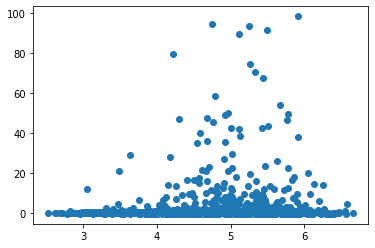

In [460]:
plt.scatter(mean_aff, value)

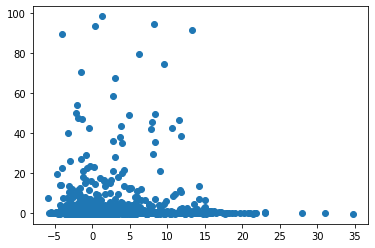

In [461]:
mean_minimizedaff = by_eos['mean_minimizedaffinity']
plt.scatter(mean_minimizedaff, value)

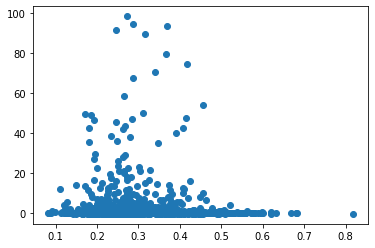

In [462]:
mean_cnnscore = by_eos['mean_cnnscore']
plt.scatter(mean_cnnscore, value)

In [433]:
# Minimization barely influences cnn affinity

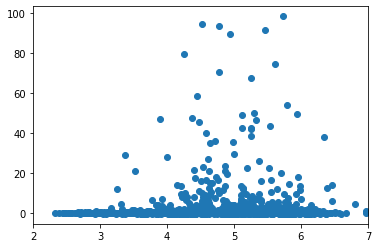

In [464]:
plt.scatter(by_eos["cnn_affinity_min_6zsl"], value)
plt.xlim([2,7])
plt.show()

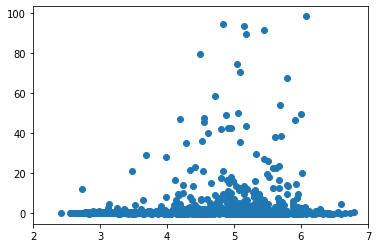

In [465]:
plt.scatter(by_eos["cnn_affinity_nonmin_6zsl"], value)
plt.xlim([2,7])
plt.show()

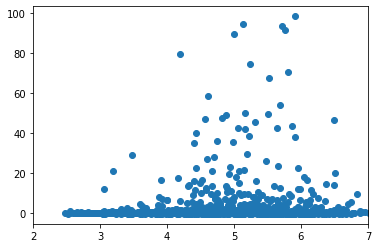

In [466]:
plt.scatter(by_eos["cnn_affinity_min_7nn0"], value)
plt.xlim([2,7])
plt.show()

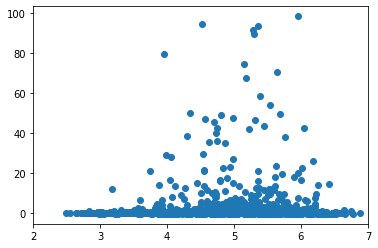

In [467]:
plt.scatter(by_eos["cnn_affinity_nonmin_7nn0"], value)
plt.xlim([2,7])
plt.show()

In [468]:
# But really impacts the vina score

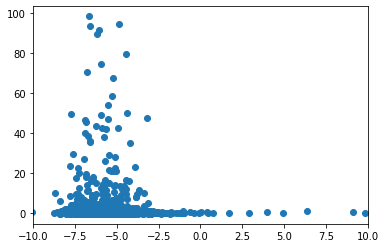

In [469]:
plt.scatter(by_eos["minimizedAffinity_min_6zsl"], value)
plt.xlim([-10,10])
plt.show()

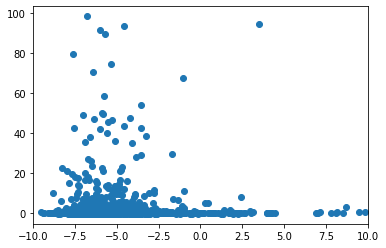

In [470]:
plt.scatter(by_eos["minimizedAffinity_min_7nn0"], value)
plt.xlim([-10,10])
plt.show()

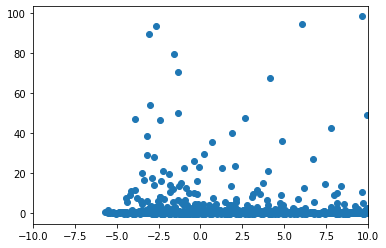

In [471]:
plt.scatter(by_eos["minimizedAffinity_nonmin_6zsl"], value)
plt.xlim([-10,10])
plt.show()

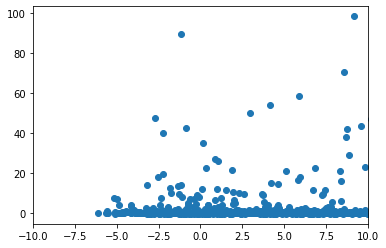

In [472]:
plt.scatter(by_eos["minimizedAffinity_nonmin_7nn0"], value)
plt.xlim([-10,10])
plt.show()

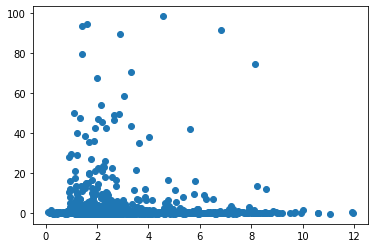

In [443]:
plt.scatter(by_eos["minimizedRMSD_min_6zsl"], value)

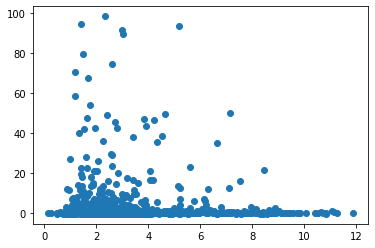

In [444]:
plt.scatter(by_eos["minimizedRMSD_min_7nn0"], value)

In [543]:
first = by_eos.sort_values(by='minimizedAffinity_min_7nn0')[minimizedaffinity_columns + values].head(n=20)
first

,minimizedAffinity_min_6zsl,minimizedAffinity_nonmin_6zsl,minimizedAffinity_min_7nn0,minimizedAffinity_nonmin_7nn0,confluence,inhibition
eos,,,,,,
EOS100329,-7.64745,-3.71108,-9.53864,4.99719,0.27,10.39
EOS100212,-7.34725,-2.17403,-9.37791,44.61668,0.23,7.64
EOS100596,-5.75265,8.47873,-9.32841,-1.96115,-0.14,-9.66
EOS100983,-6.75673,2.00131,-9.12667,7.15191,-0.02,1.13
EOS100422,-5.84114,25.50592,-9.01184,12.41714,0.05,-18.59
EOS100681,-7.17784,7.48063,-8.93457,24.73022,0.01,-1.34
EOS101097,-6.64643,-3.45313,-8.92549,25.51526,0.01,0.78
EOS101383,-8.70976,8.17971,-8.83789,2.31734,10.21,2.87
EOS100910,-6.67500,-2.97773,-8.82259,1.35774,0.03,-2.57


In [501]:
# for a, b in first['minimizedAffinity_min_7nn0'].iteritems():
#     print(f"{a} & - & {b}  \\\\ ")
#     print("\hline")

In [539]:
second = by_eos.sort_values(by='minimizedAffinity_min_6zsl')[minimizedaffinity_columns + values].head(n=10)
second
# for a, b in second['minimizedAffinity_min_6zsl'].iteritems():
#     print(f"{a} & - & {b}  \\\\ ")
#     print("\hline")
# second.loc[second.index=="EOS100983"]

,minimizedAffinity_min_6zsl,minimizedAffinity_nonmin_6zsl,minimizedAffinity_min_7nn0,minimizedAffinity_nonmin_7nn0,confluence,inhibition
eos,,,,,,
EOS100245,-11.56320,3.56485,-5.94285,77.99541,-0.07,3.74
EOS100687,-10.07519,-1.10264,-6.11270,20.03731,0.36,-3.54
EOS100870,-9.36209,22.39174,-7.73033,-5.13528,NaN,-45.22
EOS100851,-9.16312,1.67872,-0.04314,51.50083,NaN,-3.75
EOS100882,-8.76306,12.10181,2.10642,69.22664,-0.03,2.64
EOS101383,-8.70976,8.17971,-8.83789,2.31734,10.21,2.87
EOS101251,-8.55683,6.54906,-7.93612,4.13029,0.28,-0.66
EOS101777,-8.42599,16.13876,-5.41115,5.02620,-0.04,2.67
EOS101357,-8.38334,12.50782,-7.93371,3.93446,-0.27,-32.64


In [541]:
third = by_eos.sort_values(by='cnn_affinity_min_7nn0', ascending=False)[cnn_affinity_columns + values].head(n=10)
third
# for a, b in third['cnn_affinity_min_7nn0'].iteritems():
#     print(f"{a} & - & {b}  \\\\ ")
#     print("\hline")
#third.loc[third.index=="EOS100983"]

,cnn_affinity_min_6zsl,cnn_affinity_nonmin_6zsl,cnn_affinity_min_7nn0,cnn_affinity_nonmin_7nn0,confluence,inhibition
eos,,,,,,
EOS101269,6.281043,6.401834,7.272844,6.315600,-0.29,-20.84
EOS100509,6.449653,6.740462,7.028707,6.395843,-0.19,-16.33
EOS100971,6.978786,5.955856,7.019733,5.322970,0.15,-16.68
EOS100781,5.397131,5.619144,6.959638,5.674514,0.24,-5.88
EOS100979,6.297832,5.659444,6.914179,5.339434,0.24,-10.57
EOS100679,6.333614,6.227931,6.879922,6.753222,0.84,-0.80
EOS101362,6.227207,6.338386,6.876523,6.092785,-0.25,4.59
EOS100280,5.744157,5.372836,6.841160,5.667604,9.67,-23.97
EOS101607,6.383277,6.068530,6.797145,6.634041,-0.20,-4.86


In [542]:
fourth = by_eos.sort_values(by='cnn_affinity_min_6zsl', ascending=False)[cnn_affinity_columns + values].head(n=10)
fourth
# for a, b in fourth['cnn_affinity_min_6zsl'].iteritems():
#     print(f"{a} & - & {b}  \\\\ ")
#     print("\hline")
#fourth.loc[fourth.index=="EOS100983"]

,cnn_affinity_min_6zsl,cnn_affinity_nonmin_6zsl,cnn_affinity_min_7nn0,cnn_affinity_nonmin_7nn0,confluence,inhibition
eos,,,,,,
EOS101827,7.464162,5.126359,6.102261,5.558637,-0.26,-37.61
EOS100552,7.261407,6.568073,6.376983,5.514988,NaN,4.00
EOS101495,7.193174,4.938643,6.641521,6.880699,-0.04,-6.48
EOS100421,7.179943,5.682807,6.747075,6.018613,-0.28,-19.76
EOS100971,6.978786,5.955856,7.019733,5.322970,0.15,-16.68
EOS101549,6.971454,5.785956,6.166714,5.911757,0.79,-20.70
EOS100260,6.812978,6.596971,6.705183,6.214772,4.52,-2.64
EOS100895,6.679475,5.995397,6.452890,6.025005,-0.01,-2.90
EOS100531,6.593906,6.479855,5.986307,6.366769,-0.31,-25.12


In [499]:
by_eos

,cnn_score_min_6zsl,minimizedAffinity_min_6zsl,cnn_affinity_min_6zsl,cnn_vs_min_6zsl,cnnaffinity_variance_min_6zsl,minimizedRMSD_min_6zsl,cnn_score_nonmin_6zsl,minimizedAffinity_nonmin_6zsl,cnn_affinity_nonmin_6zsl,cnn_vs_nonmin_6zsl,...,inhibition,confluence,mean_cnn_aff,mean_cnn_aff_rank,mean_minimizedaffinity,mean_minimizedaffinity_rank,mean_cnnscore,mean_cnnscore_rank,combined_score,combined_score_rank
eos,,,,,,,,,,,,,,,,,,,,,
EOS100002,0.158774,-5.84789,4.816001,0.764658,0.283962,1.32400,0.369231,-1.81612,5.022079,1.854308,...,25.45,-0.04,4.892305,1599,0.050735,67,0.314464,1582,1.538453,774
EOS100003,0.014188,-6.38564,4.861772,0.068980,0.576268,2.08817,0.337924,-0.70368,5.215971,1.762600,...,-19.64,2.54,5.026173,2049,2.040743,1922,0.194043,1100,0.975294,1582
EOS100004,0.363329,-5.40304,4.968249,1.805109,1.121669,1.58794,0.326476,0.81591,4.651284,1.518533,...,33.56,0.04,4.738352,1593,-2.924053,1140,0.347757,483,1.647795,2124
EOS100005,0.103288,-6.83452,4.771642,0.492853,0.506698,2.07213,0.367111,2.65190,4.909149,1.802202,...,19.65,1.05,5.123756,2068,-4.321810,940,0.255866,2124,1.310997,483
EOS100006,0.111059,-5.25570,5.188330,0.576209,0.440016,5.68760,0.358730,13.25662,5.261770,1.887555,...,20.58,0.20,5.353192,1809,2.258945,554,0.169865,1061,0.909318,1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EOS102459,0.509407,-4.33132,5.441455,2.771914,0.769041,3.82067,0.058074,2.73695,4.604307,0.267390,...,1.31,0.10,5.148901,1264,-2.229362,351,0.264279,1599,1.360747,672
EOS102460,0.135757,-4.90358,3.772063,0.512084,0.929865,2.47583,0.459902,-3.06144,4.047682,1.861537,...,0.50,-0.14,4.043393,583,-1.863738,188,0.338443,404,1.368457,442
EOS102461,0.214306,-5.21556,3.335507,0.714820,0.300696,3.46179,0.225400,0.59974,3.393156,0.764816,...,-3.50,-0.01,3.414640,1080,-1.916623,714,0.213091,1593,0.727629,1369
